# Udacity Data Wrangling Project

### Importing Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import requests


import twitter_credentials
%matplotlib inline

# Gather

###  Gathering Get Request

In [2]:
#response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#if response.status_code == 200:
#    print('Success!')
#elif response.status_code == 404:
#    print('Not Found.')

In [3]:
images = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')

### Gathering data manually with Pandas

In [4]:
df_1 = pd.read_csv('twitter_archive_enhanced.csv')

### Gathering with the Twitter API



_With a quick assessment of the tweet_id column I saw a unique problem I would need to solve first before being able to gather my last dataset containing all of the twitter data._

In [5]:
df_1.tweet_id.head()

0    8.924210e+17
1    8.921770e+17
2    8.918150e+17
3    8.916900e+17
4    8.913280e+17
Name: tweet_id, dtype: float64

_Gathering tweets from the twitter API requires precise Tweet_id's and unfortunately my csv was imported with a column of twitter_id that had some rounding errors._

In [6]:
with pd.option_context('float_format', '{:.0f}'.format):  
    print(df_1.tweet_id.head())

0   892421000000000000
1   892177000000000000
2   891815000000000000
3   891690000000000000
4   891328000000000000
Name: tweet_id, dtype: float64


_My solution to this issue was to split the strings of the URLs addresses that were included in the twitter_enhanced_archive csv file.  Using regular expression, I would be able to extract the Tweet Id's from the end of every URL which required seperating the digits(these would be the tweet_id's I needed) from all of the char values that came before them._

In [7]:
df_1.expanded_urls.head()

0    https://twitter.com/dog_rates/status/892420643...
1    https://twitter.com/dog_rates/status/892177421...
2    https://twitter.com/dog_rates/status/891815181...
3    https://twitter.com/dog_rates/status/891689557...
4    https://twitter.com/dog_rates/status/891327558...
Name: expanded_urls, dtype: object

_My first step was to drop and null value in the expanded_urls, then take all of the remaining rows and place them into a list._

In [8]:
df_1['expanded_urls'] = df_1.expanded_urls.fillna(value='https://www.twitter.com')
urls = df_1.expanded_urls
urls = list(urls)

_Next I created a new empty list, **status**, and used a loop to extract the tweet_id's from **urls**, appending
each tweet_id to **status**. As a conditional, also appended the string '0' to status, every time my search
was unable to find an accurate tweet_id_

In [9]:
status= []
for i in range(len(urls)): 
    t= urls[i]
    if bool(re.search(r'\d', t)) == True:
        twt = re.findall(r'\d+', t)[0]
        status.append(twt)
    else:
        status.append('0')
status[:5]

['892420643555336193',
 '892177421306343426',
 '891815181378084864',
 '891689557279858688',
 '891327558926688256']

_I replaced my DataFrame column **['tweet_id']** with the values in **status** then removed all the values
that contained the string '0'._

In [10]:
df_1['tweet_id'] = status
df_1 = df_1.query("tweet_id != '0'")

_My last step was to change the data type of **['tweet_id']** from strings to the int64 data type, standardizing the **tweet_id** data type accross various sources of data to be able to merge in the future, and preparing them for my next gathering step of the Twitter API. Additionally, int64 also is the most efficient way to store values of unique digits, as integers require much less memory than a string._

In [11]:
df_1 = df_1.astype({'tweet_id':'int64'})

In [12]:
tweet_ids = df_1['tweet_id']

In [13]:
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
            
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)


In [14]:
#df_2 = pd.DataFrame(columns=['tweet_id','retweet count','favorite_count'])

#with open('tweet_json.txt') as i:
#    for line in i:
#        stat = json.loads(line)
#        tweet_id = stat['id_str']
#        retweet_count = stat['retweet_count']
#        favorite_count = stat['favorite_count']
#        df_2 = df_2.append(pd.DataFrame([[tweet_id,retweet_count,
#                                         favorite_count]], 
#                                       columns=['tweet_id',
#                                        'retweet_count', 'favorite_count']))
#df_2 = df_2.reset_index(drop=True)
#df_2.head()
        

In [15]:
#df_2.to_csv (r'C:\Users\tssan\Desktop\Udacity Projects\4wrangle\WeRateDogs.csv',
#                          index = None, header=True, sep='\t', encoding='utf-8')

In [16]:
df_2 = pd.read_csv('WeRateDogs.csv', sep='\t',encoding='utf-8')

# Assessment
### Visual Assessment

In [17]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
511,811985624773361665,NaN,NaN,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,None,None,None,None
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,None,None,None,None
26,886983233522544640,NaN,NaN,2017-07-17 16:17:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,None
1518,690932576555528194,NaN,NaN,2016-01-23 16:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,None,None,None,None
1609,685547936038666240,NaN,NaN,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685547936...,14,10,None,None,None,pupper,None
1257,9,NaN,NaN,2016-03-17 02:48:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oshie. 12/10 please enjoy (vid by @cat...,NaN,NaN,NaN,https://vine.co/v/iw9hUFAMerV,12,10,Oshie,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
1758,678755239630127104,NaN,NaN,2015-12-21 01:53:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dash. He didn't think the water would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678755239...,10,10,Dash,None,None,None,None
1673,682303737705140231,NaN,NaN,2015-12-30 20:54:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Todo. He's screaming because he doesn'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682303737...,9,10,Todo,None,None,None,None


_First thing I recognize from a visual assessment is that...'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', all have a majority of NaN values. I will drop them to tidy up the **df_1** DataFrame._

In [18]:
images.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


_First thing I recognize from a visual assessment is that..._

In [19]:
df_2.head(20)

,favorite_count,retweet count,retweet_count,tweet_id
0,37135,NaN,7937.0,892420643555336193
1,31939,NaN,5900.0,892177421306343426
2,24054,NaN,3899.0,891815181378084864
3,40456,NaN,8095.0,891689557279858688
4,38672,NaN,8778.0,891327558926688256
5,19442,NaN,2917.0,891087950875897856
6,11340,NaN,1937.0,890971913173991426
7,62632,NaN,17701.0,890729181411237888
8,26740,NaN,4020.0,890609185150312448
9,30632,NaN,6903.0,890240255349198849


_First thing I recognize from a visual assessment is that... **['retweet count']** is a duplicate column to **['reteet_count'] and has a majority of NaN values. I will drop them to tidy up the **df_2** DataFrame._

### Programatic Assessment

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2270 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2270 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2270 non-null object
source                        2270 non-null object
text                          2270 non-null object
retweeted_status_id           176 non-null float64
retweeted_status_user_id      176 non-null float64
retweeted_status_timestamp    176 non-null object
expanded_urls                 2270 non-null object
rating_numerator              2270 non-null int64
rating_denominator            2270 non-null int64
name                          2270 non-null object
doggo                         2270 non-null object
floofer                       2270 non-null object
pupper                        2270 non-null object
puppo                         2270 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 4 columns):
favorite_count    2166 non-null int64
retweet count     0 non-null float64
retweet_count     2166 non-null float64
tweet_id          2166 non-null int64
dtypes: float64(2), int64(2)
memory usage: 67.8 KB


In [22]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_1.groupby(['rating_numerator']).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo
rating_numerator,,,,,,,,,,,,,,,,
0,2,1,1,2,2,2,0,0,0,2,2,2,2,2,2,2
1,6,0,0,6,6,6,1,1,1,6,6,6,6,6,6,6
2,9,0,0,9,9,9,0,0,0,9,9,9,9,9,9,9
3,19,0,0,19,19,19,0,0,0,19,19,19,19,19,19,19
4,16,0,0,16,16,16,0,0,0,16,16,16,16,16,16,16
5,35,0,0,35,35,35,1,1,1,35,35,35,35,35,35,35
6,32,0,0,32,32,32,0,0,0,32,32,32,32,32,32,32
7,53,0,0,53,53,53,1,1,1,53,53,53,53,53,53,53
8,102,0,0,102,102,102,4,4,4,102,102,102,102,102,102,102


_Would stood out to me the most while looking over the numerator values is that for all the numerators
greater than 14, all of the values are listed only once, with the exception of 75.
I decided to look into this a little further to figure out why this was._

In [24]:
df_1[df_1['rating_numerator'] == 75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,786709082849828864,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.870000e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [25]:
df_1.text[df_1.rating_numerator== 75]

340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object

In [26]:
df_1.tweet_id.duplicated().any()

True

In [27]:
df_2.tweet_id.duplicated().any()

True

In [28]:
images.tweet_id.duplicated().any()

False

In [29]:
df_1.groupby(['rating_denominator']).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
rating_denominator,,,,,,,,,,,,,,,,
2,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
7,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
10,2251,22,22,2251,2251,2251,175,175,175,2251,2251,2251,2251,2251,2251,2251
11,3,0,0,3,3,3,1,1,1,3,3,3,3,3,3,3
20,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
40,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
50,3,0,0,3,3,3,0,0,0,3,3,3,3,3,3,3
70,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
80,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2


_2251 of the 2270 observations have a denominator of 10.  Only 2 had a denominator less than 10 and 17 had denominators greater than 10.  I decided to look into this further to see if I could find out why this was._

In [30]:
df_1.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,740373189193256964,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.400000e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [31]:
df_1.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [32]:
example_1 = df_1.text[df_1.tweet_id == 810984652412424192]
example_2 = df_1.text[df_1.tweet_id == 666287406224695296]
list(example_1), list(example_2)

(['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'],
 ['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'])

In [33]:
df_1['timestamp'].min(), df_1['timestamp'].max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

In [34]:
df_1.timestamp[:5]

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object


# Cleaning

1.  _Define the solution :  Dropping the columns with a majority of NaN values from **df_1**_

1. _Code for fix_

In [35]:
df_1.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                   'retweeted_status_user_id','retweeted_status_timestamp'
                   ], inplace=True)

1. _Test the results_

In [36]:
df_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

_2. Define the solution_

_2. Code for fix_

In [37]:
df_1['cute_name'] = df_1['doggo'].str.cat(df_1['pupper']
                                         .replace('None','')).str.cat(df_1['floofer']
                                                                      .replace('None','')).str.cat(df_1['puppo']
                                                                                                   .replace('None',''))

In [38]:
df_1['cute_name'] = df_1.cute_name.replace('Nonefloofer','floofer')
df_1['cute_name'] = df_1.cute_name.replace('Nonepupper','pupper')
df_1['cute_name'] = df_1.cute_name.replace('Nonepuppo','puppo')
df_1['cute_name'] = df_1.cute_name.replace('doggopupper','doggo, pupper')
df_1['cute_name'] = df_1.cute_name.replace('doggofloofer','doggo, floofer')
df_1['cute_name'] = df_1.cute_name.replace('doggopuppo','doggo, puppo')
df_1['cute_name'] = df_1.cute_name.replace('None','Other')
df_1.drop(columns=['doggo', 'floofer','pupper', 'puppo'],inplace=True)

_2. Test the results_

In [39]:
df_1.cute_name.value_counts()

Other             1898
pupper             241
doggo               80
puppo               28
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: cute_name, dtype: int64

In [40]:
df_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'cute_name'],
      dtype='object')

_3. Define the solution_

_3. Code the fix_

In [41]:
df_1.loc[2335, 'rating_denominator']= 10
df_1.loc[2335, 'rating_numerator']= 9

_3. Test the results_

In [42]:
print(f"This dog's rating is {df_1.loc[2335,'rating_numerator']}/{df_1.loc[2335,'rating_denominator']}")

This dog's rating is 9/10


_4. Define the solution_

_4. Code the fix_

In [43]:
df_1.loc[516, 'rating_numerator']= np.median(df_1.rating_numerator)
df_1.loc[516, 'rating_denominator']= np.median(df_1.rating_denominator)

_4. Test the results_

In [44]:
print(f"Since Sam was never given a rating, I gave him the median rating which is {df_1.loc[516,'rating_numerator']}/{df_1.loc[516,'rating_denominator']}")

Since Sam was never given a rating, I gave him the median rating which is 11.0/10.0


_5. Define the solution_

_5. Code the fix_

In [45]:
df_1 = df_1.drop_duplicates(subset=['tweet_id'],keep='first')
df_2 = df_2.drop_duplicates(subset=['tweet_id'],keep='first')

_5. Test the results_

In [46]:
df_1.tweet_id.duplicated().any(), df_2.tweet_id.duplicated().any()

(False, False)

_6. Define the solution_

_6. Code the fix_

In [47]:
df_2.drop(columns='retweet count', inplace= True)

_6. Test the results_

In [48]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2165
Data columns (total 3 columns):
favorite_count    2026 non-null int64
retweet_count     2026 non-null float64
tweet_id          2026 non-null int64
dtypes: float64(1), int64(2)
memory usage: 63.3 KB


_7. Define the solution_

_7. Code the fix_

_8. Test the result_

In [49]:
df = df_1.merge(df_2, on='tweet_id', how='inner')

In [50]:
df = df.merge(images, on='tweet_id', how='inner')
df = df.reset_index(drop=True)

_9. Test the results_


In [51]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,cute_name,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Other,37135,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Other,31939,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Other,24054,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,Other,40456,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,Other,38672,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 22 columns):
tweet_id              1979 non-null int64
timestamp             1979 non-null object
source                1979 non-null object
text                  1979 non-null object
expanded_urls         1979 non-null object
rating_numerator      1979 non-null float64
rating_denominator    1979 non-null float64
name                  1979 non-null object
cute_name             1979 non-null object
favorite_count        1979 non-null int64
retweet_count         1979 non-null float64
jpg_url               1979 non-null object
img_num               1979 non-null int64
p1                    1979 non-null object
p1_conf               1979 non-null float64
p1_dog                1979 non-null bool
p2                    1979 non-null object
p2_conf               1979 non-null float64
p2_dog                1979 non-null bool
p3                    1979 non-null object
p3_conf               1979 non-null

_10. Define the solution_

_10. Code for fix_

In [53]:
df.drop(columns=['source'],inplace=True)

_10. Test the results_

In [54]:
df.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,cute_name,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Other,37135,7937.0,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Other,31939,5900.0,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Other,24054,3899.0,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,Other,40456,8095.0,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,Other,38672,8778.0,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


_11. Define the solution_

_11. Code the fix_ 

#### Normalizing Denominators to a Standard of 10  
structuring data to facilitate analysis

In [55]:
norm_numerator= []
norm_denominator= []
for i, row in df.iterrows():
    norm = 10 / row['rating_denominator']
    num = row['rating_numerator'] = row['rating_numerator']* norm
    norm_numerator.append(num)
    den = row['rating_denominator'] = row['rating_denominator']* norm
    norm_denominator.append(den)
    

In [56]:
df['rating_numerator'] = norm_numerator
df['rating_denominator'] = norm_denominator

_11. Test the results_

In [57]:
df.query('rating_denominator !=10')['rating_denominator'].any()

False

In [58]:
df.drop(columns=['rating_denominator'],inplace = True)
df.rename(columns={"rating_numerator": "rating"},inplace=True)

In [59]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating', 'name',
       'cute_name', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [60]:
df.rating.value_counts()

12.000000      449
10.000000      420
11.000000      401
13.000000      254
9.000000       152
8.000000        95
7.000000        51
14.000000       35
5.000000        33
6.000000        32
3.000000        19
4.000000        15
2.000000        10
1.000000         4
0.000000         2
27.000000        1
1776.000000      1
26.000000        1
8.181818         1
6.363636         1
75.000000        1
420.000000       1
Name: rating, dtype: int64

_12. Define the solution: Correcting Ratings Containing Decimal Places, Using Regular Expression to loop through each text and pull out any digits with decimal places_

_12. Code the fix_ 

In [61]:
for i, row in df.iterrows():
    in_str= row['text']
    split = re.split(r'/' , in_str)[0]
    if bool(re.search(r'\d+\.\d+$', split)) == True:
        after = re.findall(r'\d+\.\d+', split)[0]
        before = df.loc[i, 'rating']
        df.loc[i, 'rating'] = after
        print(f"The rating in row {i} used to be {before} and now is {after}.")
    else:
        pass

The rating in row 40 used to be 5.0 and now is 13.5.
The rating in row 262 used to be 75.0 and now is 9.75.
The rating in row 585 used to be 27.0 and now is 11.27.
The rating in row 1380 used to be 26.0 and now is 11.26.


In [62]:
df.rating.dtype

dtype('O')

In [63]:
#No longer need the denominator columns, and the rating_numerator column
#can just become rating (on a standardized scale of 10)
df['rating'] = df['rating'].astype('float64')


_13. Define the solution_

_13. Code the fix_

In [64]:
# Rounding Ratings to get a discrete scale
for i, row in df.iterrows():
    before = df.loc[i, 'rating']
    after = round(df.rating[i], 0)
    df.loc[i, 'rating'] = after
    if bool(before == after) == False :
        print(f"The rating in row {i} used to be {before} and now is {after}.")
    else:
        pass

The rating in row 40 used to be 13.5 and now is 14.0.
The rating in row 262 used to be 9.75 and now is 10.0.
The rating in row 585 used to be 11.27 and now is 11.0.
The rating in row 602 used to be 8.181818181818182 and now is 8.0.
The rating in row 1336 used to be 6.363636363636363 and now is 6.0.
The rating in row 1380 used to be 11.26 and now is 11.0.


_12. Define the solution_


_12. Code the fix_

In [65]:
time = df['timestamp']
time = list(time)

In [66]:
times = []
for i in range(len(time)): 
    t= time[i]
    t = t.rpartition(' ')[0]
    stamp = t.rpartition(' ')[0]
    times.append(stamp)

In [67]:
df['timestamp'] = times
df['timestamp'] = pd.to_datetime(df['timestamp'])

_12. Test the results_

In [68]:
df.timestamp[:5]

0   2017-08-01
1   2017-08-01
2   2017-07-31
3   2017-07-30
4   2017-07-29
Name: timestamp, dtype: datetime64[ns]

_11. Define the solution_

_11. Code the fix_

In [69]:
df = df.astype({'rating' : int, 'retweet_count' : int} )

_11. Test the results_

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 20 columns):
tweet_id          1979 non-null int64
timestamp         1979 non-null datetime64[ns]
text              1979 non-null object
expanded_urls     1979 non-null object
rating            1979 non-null int64
name              1979 non-null object
cute_name         1979 non-null object
favorite_count    1979 non-null int64
retweet_count     1979 non-null int64
jpg_url           1979 non-null object
img_num           1979 non-null int64
p1                1979 non-null object
p1_conf           1979 non-null float64
p1_dog            1979 non-null bool
p2                1979 non-null object
p2_conf           1979 non-null float64
p2_dog            1979 non-null bool
p3                1979 non-null object
p3_conf           1979 non-null float64
p3_dog            1979 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(5), object(8)
memory usage: 268.7+ KB


In [71]:
df.to_csv (r'~/Desktop/Udacity Projects/4wrangle/WeRateDogs_Clean.csv',
                        index = False, header=True, sep='\t', encoding='utf-8')

In [72]:
df_cln = pd.read_csv('WeRateDogs_Clean.csv', sep='\t',encoding='utf-8')

# Finding a Winner

In [73]:
df_cln.groupby(['rating']).count()

,tweet_id,timestamp,text,expanded_urls,name,cute_name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
rating,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
4,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
5,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
6,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
7,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
8,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96


In [74]:
df_cln[df_cln['rating'] == 420]

,tweet_id,timestamp,text,expanded_urls,rating,name,cute_name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1712,670842764863651840,2015-11-29,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,None,Other,24351,8574,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [75]:
df_cln.text[1712]

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [76]:
print(df_cln.jpg_url[1712])

https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg


### At second place Snoop Dogg comes in at very impressive 420 out of 10
<img src="second.jpg"/>

In [77]:
df_cln[df_cln['rating'] == 1776]

,tweet_id,timestamp,text,expanded_urls,rating,name,cute_name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
757,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,Atticus,Other,5253,2528,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [78]:
df_cln.text[757]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [79]:
print(df_cln.jpg_url[757])

https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


### Congratulation to the winner coming in at 1776 out of 10, such a good boy!
<img src="winner.jpg"/>

## Distribution of Dog Ratings by Dog Types

_The two winners above are data points that were accurately gathered, but their ratings are also global outliers to the rest of the observations. But as we can see from the box plots below, these global outliers greatly increase the standard deviation of the variable **rating** in our DataFrame.  
To facilitate easier analysis, I decided to remove the two outliers, and take a deeper look into the distribution of ratings by dog type._

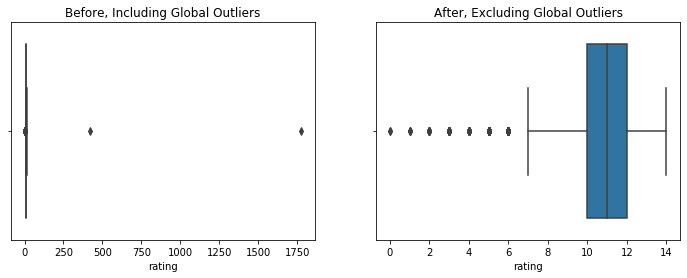

In [80]:
df_before= df_cln.copy()
df_after = df_cln[df_cln['rating'] < 15]

#df_before= plots of the distribution of the data before and after removing the two outliers
f, axes = plt.subplots(1, 2, figsize=(12,4))

sns.boxplot(data=df_before,x= 'rating',orient='w', ax=axes[0])
axes[0].set_title('Before, Including Global Outliers')


sns.boxplot(data=df_after, x= 'rating',orient='w', ax=axes[1])
axes[1].set_title('After, Excluding Global Outliers');

In [81]:
df_rate = df_after.copy()

In [82]:
df_rate['p1'].value_counts()

golden_retriever             138
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Staffordshire_bullterrier     17
beagle                        17
Rottweiler                    17
Cardigan                      17
Lakeland_terrier              16
kuvasz                        16
Italian_greyhound             16
web_site                      15
          

In [83]:
dog_types = df_rate['p1'].value_counts().keys()
dog_types = list(dog_types)

In [84]:
dog_types = dog_types[:9]

In [85]:
for d in dog_types:
    df_other = df_rate[(df_rate.p1 != d)]

df_other = df_other.rating.value_counts().sort_index()
df_other = df_other.rename_axis('rating').to_frame('other')

for d in dog_types:
    df_add = df_rate[df_rate['p1'] == d ]
    df_add = df_add.rating.value_counts().sort_index()
    df_add = df_add.rename_axis('rating').to_frame(d)
    df_other = df_other.merge(df_add, on='rating',how='left').fillna(0)
    

df_other.loc[:,'Total'] = df_other.sum(axis=1)
df_other.index = df_other.index.map(str)
df_other.columns = [x.lower() for x in df_other.columns]
df_all = df_other.copy()
df_all

,other,golden_retriever,labrador_retriever,pembroke,chihuahua,pug,chow,samoyed,pomeranian,toy_poodle,total
rating,,,,,,,,,,,
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,19,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,21.0
4,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
5,32,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0
6,33,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,35.0
7,51,0.0,1.0,1.0,4.0,2.0,0.0,1.0,0.0,0.0,60.0
8,96,3.0,3.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,108.0


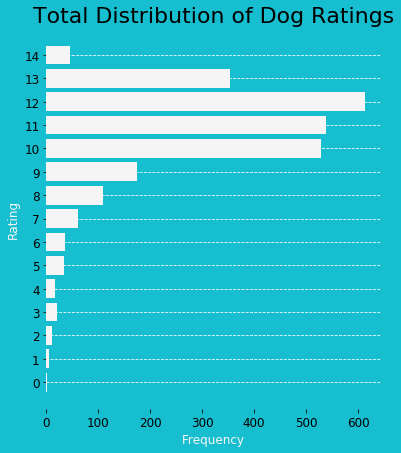

In [86]:
b='Black'
r = df_all.index
t = df_all.total
c= sns.color_palette()[9]
f_sz=12
w='whitesmoke'
fig = plt.figure(figsize=(6,7), facecolor=c)

            
ax = plt.subplot(1, 1, 1)
plt.barh(range(len(r)),t, color=w)
plt.yticks(range(len(r)),r,fontsize=12, color=b)
plt.ylabel('Rating',color=w,fontsize=f_sz)
plt.xticks(color=b,fontsize=f_sz)
plt.xlabel('Frequency',color=w,fontsize=f_sz)
plt.title('Total Distribution of Dog Ratings',color='Black',fontsize=22)

ax.set_axisbelow(True)
ax.yaxis.grid(color='white', linestyle='dashed')
plt.box(False)
plt.show()

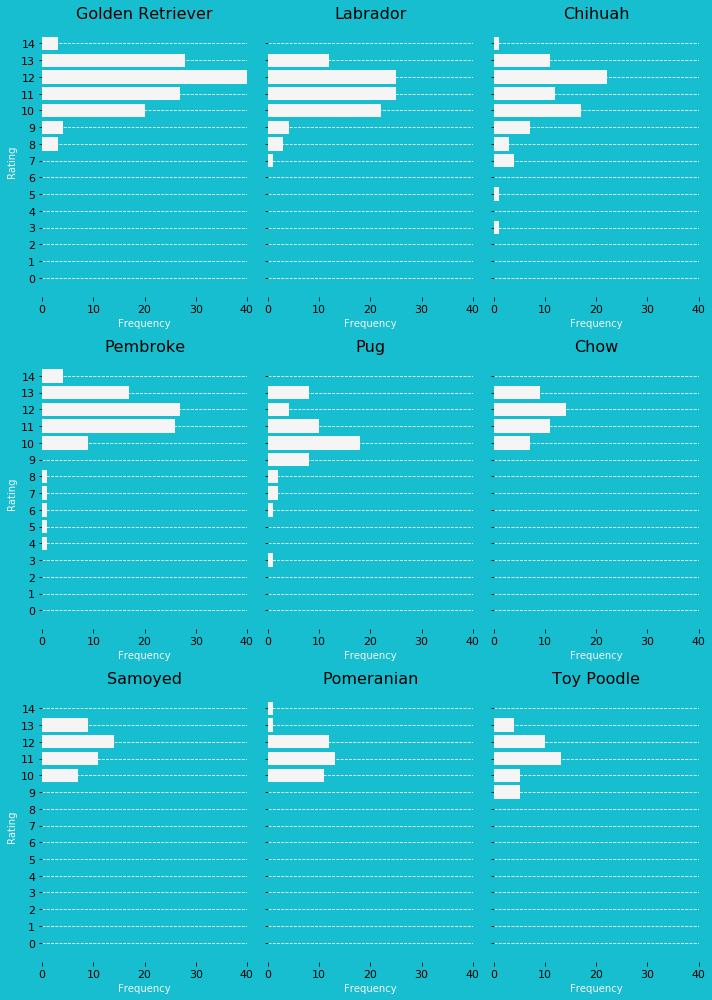

In [87]:
from mpl_toolkits.axes_grid1 import Grid
i = df_all.index
t = df_all.total
r = df_all.index
ch = df_all.chihuahua
g = df_all.golden_retriever
l = df_all.labrador_retriever
p = df_all.pembroke
pu = df_all.pug
ow = df_all.chow
s = df_all.samoyed
pm = df_all.pomeranian
tp = df_all.toy_poodle
c= sns.color_palette()[9]
w='whitesmoke'
b='Black'
f_sz=16
lim = [0,40]
fig = plt.figure(figsize=(10,14), facecolor=c)
grid = Grid(fig, rect=111, nrows_ncols=(2,2),
            axes_pad=0.25, label_mode='L')



ax1= plt.subplot(3, 3, 1)
plt.barh(range(len(r)),g, color=w)
plt.yticks(range(len(r)),r,fontsize=11,color=b)
plt.xticks(color=b,fontsize=11)
plt.xlabel('Frequency',color=w)
plt.ylabel('Rating',color=w)
plt.box(False)
plt.title('Golden Retriever',fontsize=f_sz,color=b)
plt.xlim(lim)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='white', linestyle='dashed')

ax2= plt.subplot(3, 3, 2)
plt.barh(range(len(r)),l, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Labrador',fontsize=f_sz,color=b)
plt.xlim(lim)
ax2.set_axisbelow(True)
ax2.yaxis.grid(color='white', linestyle='dashed')

ax3 = plt.subplot(3, 3, 3)
plt.barh(range(len(r)),ch, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Chihuah',fontsize=f_sz,color=b)
plt.xlim(lim)
ax3.set_axisbelow(True)
ax3.yaxis.grid(color='white', linestyle='dashed')

ax4 = plt.subplot(3, 3, 4)
plt.barh(range(len(r)),p, color=w)
plt.yticks(range(len(r)),r,fontsize=11,color=b)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.ylabel('Rating',color=w)
plt.box(False)
plt.title('Pembroke',fontsize=f_sz,color=b)
plt.xlim(lim)
ax4.set_axisbelow(True)
ax4.yaxis.grid(color='white', linestyle='dashed')

ax5 = plt.subplot(3, 3, 5)
plt.barh(range(len(r)),pu, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax5.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Pug', fontsize=f_sz, color=b)
plt.xlim(lim)
ax5.set_axisbelow(True)
ax5.yaxis.grid(color='white', linestyle='dashed')

ax6 = plt.subplot(3, 3, 6)
plt.barh(range(len(r)),ow, color=w)
plt.yticks(range(len(r)),r)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax6.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Chow', fontsize=f_sz, color=b)
plt.xlim(lim)
ax6.set_axisbelow(True)
ax6.yaxis.grid(color='white', linestyle='dashed')

ax7 = plt.subplot(3, 3, 7)
plt.barh(range(len(r)),ow, color=w)
plt.yticks(range(len(r)),r,fontsize=11,color=b)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.ylabel('Rating',color=w)
plt.setp(ax7.get_yticklabels(), visible=True)
plt.box(False)
plt.title('Samoyed', fontsize=f_sz, color=b)
plt.xlim(lim)
ax7.set_axisbelow(True)
ax7.yaxis.grid(color='white', linestyle='dashed')

ax8 = plt.subplot(3, 3, 8)
plt.barh(range(len(r)),pm, color=w)
plt.yticks(range(len(r)),r,)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax8.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Pomeranian', fontsize=f_sz, color=b)
plt.xlim(lim)
ax8.set_axisbelow(True)
ax8.yaxis.grid(color='white', linestyle='dashed')

ax9 = plt.subplot(3, 3, 9)
plt.barh(range(len(r)),tp, color=w)
plt.yticks(range(len(r)),r,)
plt.xticks(color=b, fontsize=11)
plt.xlabel('Frequency',color=w)
plt.setp(ax9.get_yticklabels(), visible=False)
plt.box(False)
plt.title('Toy Poodle', fontsize=f_sz, color=b)
plt.xlim(lim)
ax9.set_axisbelow(True)
ax9.yaxis.grid(color='white', linestyle='dashed')

plt.tight_layout()
plt.show()

## Time Series of WeRateDogs Tweets

In [88]:
df_time = df_cln.copy()

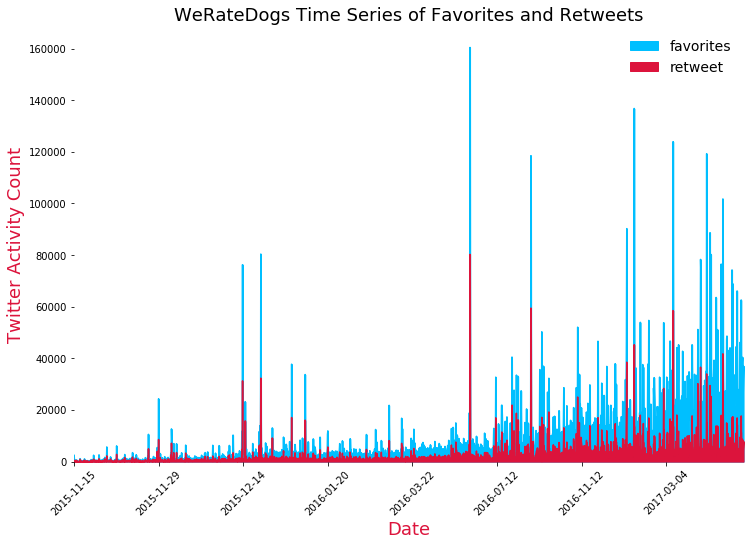

In [89]:
# TimeSeries of Twitter Activity 

#Favorite and Retweet series
time_faves = pd.Series(data=df_time['favorite_count'].values, index=df_time['timestamp']).sort_index(ascending=True)
time_retweets = pd.Series(data=df_time['retweet_count'].values, index=df_time['timestamp']).sort_index(ascending=True)

#Plotting both series to the same axis
size= (12,8)

time_faves.plot(kind='area',figsize=size, label='favorites',
                color='deepskyblue',legend=True)
time_retweets.plot(kind='area',figsize=size, label='retweet',
                   color='crimson',legend=True)

#Labels and preferences for the visualization

plt.title('WeRateDogs Time Series of Favorites and Retweets',fontsize=18)
plt.xlabel('Date',fontsize=18,color='crimson') 
plt.ylabel('Twitter Activity Count',fontsize=18, color='crimson')
plt.xticks(rotation=45)
plt.legend(fontsize=14,frameon=False)


plt.box(False)
plt.show();